<a href="https://colab.research.google.com/github/spindlerdouglas/opencv-matplotlib/blob/main/Basic_OpenCV_operations_with_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [ ]:
%matplotlib inline

In [ ]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

##Printing image properties:

In [97]:
letter_c = cv2.imread('/content/letter_c_gray.png', cv2.IMREAD_GRAYSCALE)
letter_c
len(letter_c)

15

In [ ]:
print("Pixel type: {}\n".format(letter_c.dtype))
print("Object type: {}\n".format(type(letter_c)))
print("Dimensões: {}\n".format(letter_c.shape))

Pixel type: uint8

Object type: <class 'numpy.ndarray'>

Dimensões: (15, 15)



## Plotting and adding colorbar:

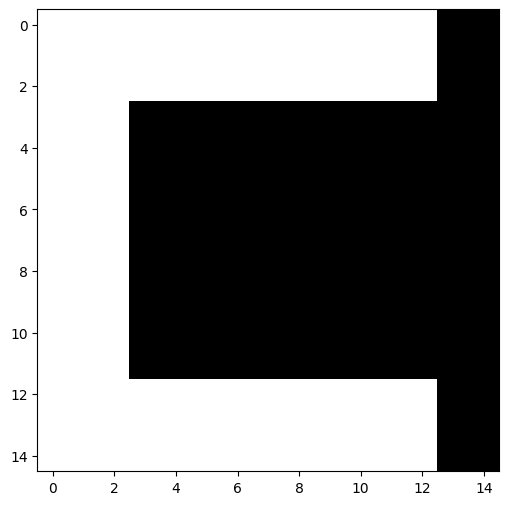

In [ ]:
plt.imshow(letter_c)

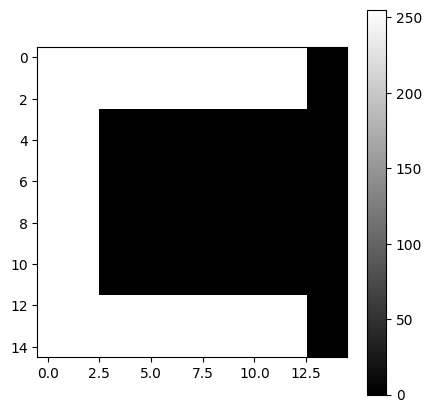

In [ ]:
plt.figure(figsize=[5,5])
plt.imshow(letter_c)
plt.colorbar();

Changing the content of the first pixel

In [ ]:
letter_c[0, 2] = 200


Copying the region of interest to another image

In [ ]:
roi = letter_c[:10, :5]

Text(0.5, 1.0, 'ROI')

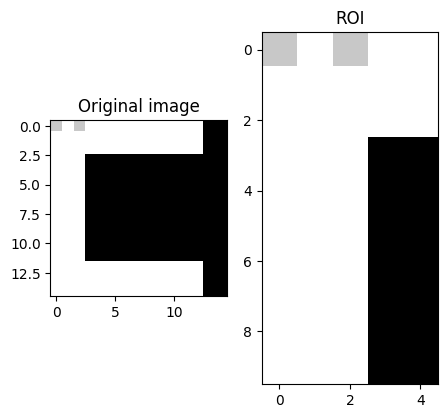

In [ ]:
plt.figure(figsize=[5,5])
plt.subplot(121)
plt.imshow(letter_c)
plt.title('Original image')

plt.subplot(122)
plt.imshow(roi)
plt.title('ROI')

## Scaling
Matplotlib does not automatically consider the original image's scale when plotting a ROI. As such, in order to keep the oiriginal scale, we need to explicitly specify the image size using the _figsize_ function when creating it.

(10, 5)
(1.6666666666666665, 1.6666666666666665)


Text(0.5, 1.0, 'ROI')

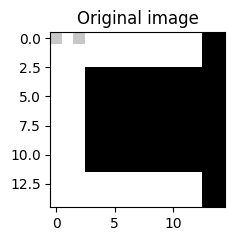

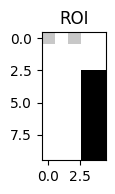

In [ ]:
h_original, w_original = letter_c.shape[:2]
h_roi, w_roi = roi.shape[:2]
print(roi.shape)

figsize_original = (5, 5)
scale = min(h_roi / h_original, w_roi / w_original)
figsize_roi = (figsize_original[0] * scale, figsize_original[1] * scale)
print(figsize_roi)

plt.figure(figsize=figsize_original)

plt.subplot(211)
plt.imshow(letter_c)
plt.title('Original image')

plt.figure(figsize=figsize_roi)
plt.imshow(roi)
plt.title('ROI')

## Changing the colors using a gradient

In [ ]:
new = []
row = []
color = 100
for r in range(len(letter_c)):
  row = []
  for c in range(len(letter_c)):
    color = color + 1
    if letter_c[r][c] == 255:
      row.append(color)
    else:
      row.append(letter_c[r][c]) 
     
  new.append(row)

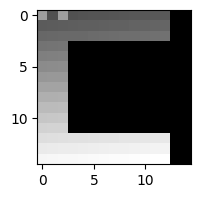

In [ ]:
plt.figure(figsize=[2,2])
plt.imshow(new)

## Splitting and merging channels:

OpenCV loads the image in format BGR, instead of standard RGB. Method _imshow_ expects the image in format RGB. The first plot below illustrates what happens when plotting the image imported with OpenCV directly, without inverting the order of the channels.

(2250, 2000, 3)


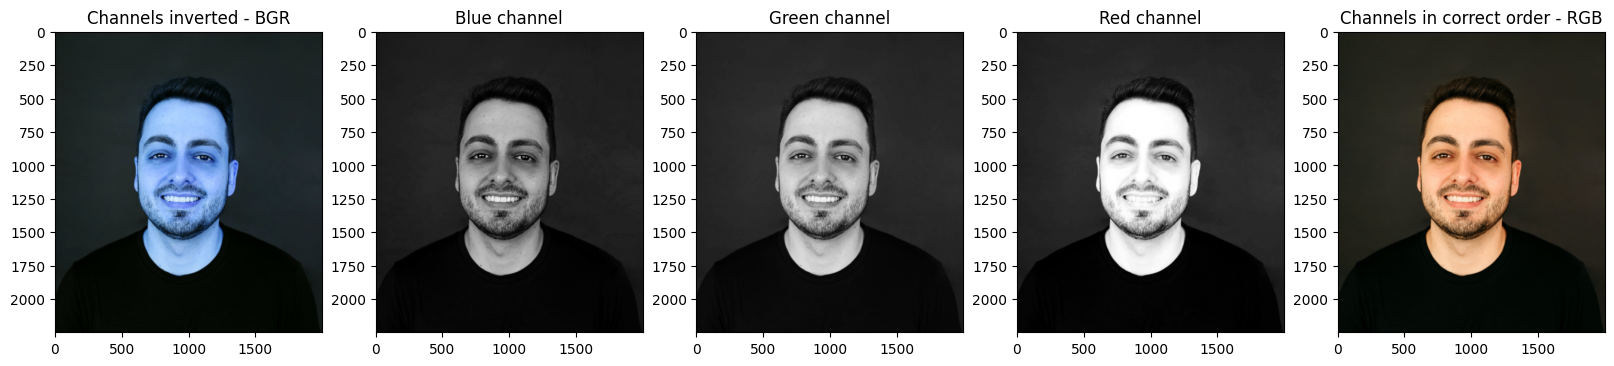

In [99]:
me = cv2.imread('/content/me.png', cv2.IMREAD_UNCHANGED)
print(me.shape)
b, g, r = cv2.split(me)
plt.figure(figsize=[20,5])

plt.subplot(151); plt.title('Channels inverted - BGR'); plt.imshow(me)
plt.subplot(152); plt.title('Blue channel'); plt.imshow(b)
plt.subplot(153); plt.title('Green channel'); plt.imshow(g)
plt.subplot(154); plt.title('Red channel'); plt.imshow(r)

img_merged = cv2.merge((b, g, r))  # the correct order can be specified here directly
img_merged = img_merged[...,::-1]  # this is just an alternative way to invert the channels 
plt.subplot(155); plt.title('Channels in correct order - RGB'); plt.imshow(img_merged)

## Data type conversion and contrast enhancement

(1000, 1800, 3)
Data type after contrast change:  float64
Data type after conversion:  uint8


Text(0.5, 1.0, 'Image with enhanced contrast')

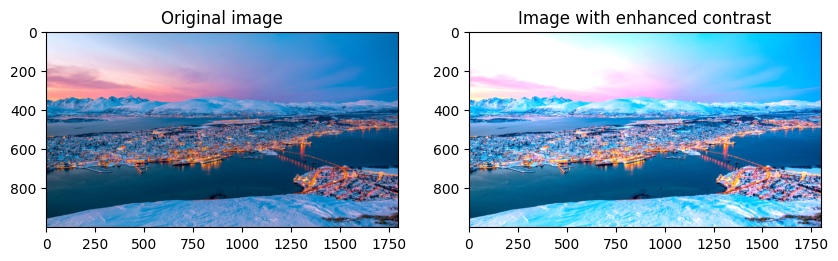

In [103]:
# load image and apply contrast intensity factor
# tromso = cv2.imread('/content/tromso.png', cv2.IMREAD_UNCHANGED)
tromso = cv2.imread('/content/tromso.png', cv2.IMREAD_COLOR)
tromso = tromso[...,::-1]
print(tromso.shape)
intensity_scaling_factor = 1.5
tromso_contrast = tromso * intensity_scaling_factor

# remove values outside the valid boundaries
tromso_contrast = np.clip(tromso_contrast, 0, 255)
print("Data type after contrast change: ", tromso_contrast.dtype)

# convert back to 8-bit integer
tromso_contrast = np.uint8(tromso_contrast)
print("Data type after conversion: ", tromso_contrast.dtype)

# display original and enhanced images side-by-side
plt.figure(figsize=[10, 10])
plt.subplot(121); plt.imshow(tromso); plt.title('Original image')
plt.subplot(122); plt.imshow(tromso_contrast); plt.title('Image with enhanced contrast')

In [ ]:
def is_palindrome(input):
  return input == input[::-1]

is_palindrome("socorrammesubinoonibusemmarrocos")

True